In [35]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"

In [36]:
X = 2*np.random.rand(100,1)
Y = 4 + 3*X + np.random.rand(100,1)

<function matplotlib.pyplot.show>

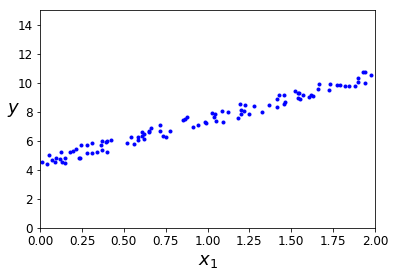

In [37]:
plt.plot(X,Y,"b.")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation = 0, fontsize = 18)
plt.axis([0,2,0,15])
plt.show

## Linear regression from scratch

In [38]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

In [39]:
theta_best

array([[ 4.51359766],
       [ 2.98323418]])

In [40]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[  4.51359766],
       [ 10.48006601]])

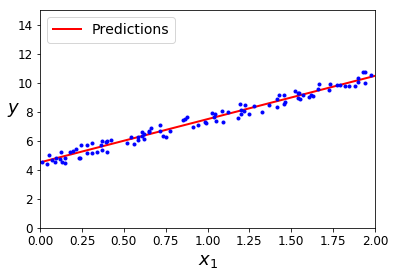

In [41]:
plt.plot(X_new, y_predict,"r-",linewidth = 2,label = "Predictions")
plt.plot(X, Y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

## Linear regression in scikit learn

In [42]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
lin_reg.predict(X_new)

array([[  4.51359766],
       [ 10.48006601]])

## Batch gradient descent from scratch

In [43]:
eta = 0.1 #learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)
for x in range(n_iterations):
    gradient = 2*X_b.T.dot(X_b.dot(theta)-Y)/m
    theta-=eta*gradient

In [44]:
theta

array([[ 4.51359766],
       [ 2.98323418]])

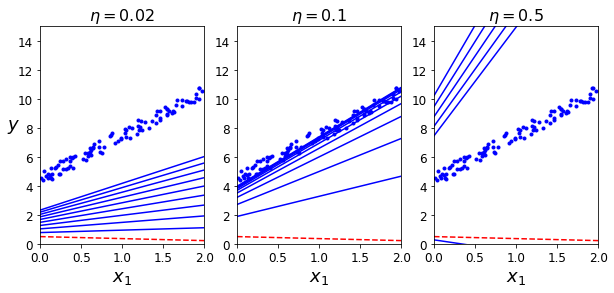

In [45]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, Y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - Y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

## Stochastic Gradient Descent

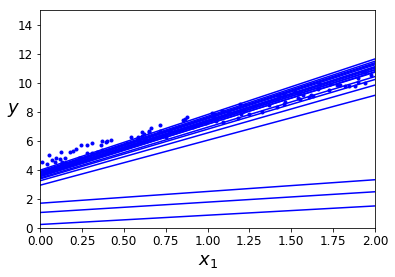

In [61]:
m = len(X_b)
n_epochs = 50
t0,t1 = 5,50
theta = np.random.randn(2,1)
def learning_schedule(t):
    return t0/(t+t1)
for epoch in range(n_epochs):
    for instance in range(m):
        if epoch == 0 and instance < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if instance > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)
        random_instance = np.random.randint(m)
        xi = X_b[random_instance:random_instance+1]
        yi = Y[random_instance:random_instance+1]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+instance)
        theta-= eta*gradients
plt.plot(X, Y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show() 

In [59]:
theta

array([[ 4.49848958],
       [ 2.97876492]])

## SGD using sklearn

In [63]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50,penalty=None,eta0=0.1)
sgd_reg.fit(X,Y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [64]:
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.51273277]), array([ 2.98491317]))

## Mini Batch Gradient descent from scratch

In [78]:
n_iterations = 50
minibatch_size = 20
theta = np.random.randn(2,1)

t0,t1 = 10,1000
def learning_schedule(t):
    return t0/(t+t1)
t=0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    Y_shuffled = Y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t+=1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = Y_shuffled[i:i+minibatch_size]
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(t)
        theta-=eta*gradients

In [79]:
theta

array([[ 4.50915043],
       [ 2.97956913]])